# import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection and Analysis

In [2]:
parkinsons = pd.read_csv(r"C:\Users\shaik\Downloads\parkinsons (1).csv")

In [3]:
parkinsons.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

In [4]:
parkinsons.shape
     

(195, 24)

In [5]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# checking for missing values in each column
parkinsons.isnull().sum()
     

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# getting some statistical measures about the data
parkinsons.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [8]:
parkinsons.keys()

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [9]:
# distribution of target Variable
parkinsons['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1 --> Parkinson's Disease Present

0 --> Healthy

checking status

In [10]:
parkinsons['status'].unique()

array([1, 0], dtype=int64)

In [11]:
parkinsons['status'] = pd.to_numeric(parkinsons['status'], errors='coerce')


In [12]:
parkinsons['status'].isnull().sum()

0

In [13]:
unique_values = parkinsons['status'].unique()
print(unique_values)



[1 0]


In [14]:
print(parkinsons.dtypes)


name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [15]:
# Exclude 'name' column from the calculation
parkinsons.drop('name', axis=1).groupby('status').mean()


MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR        HNR  \
status                    ...                                               
0               0.162958  ...  0.013305     0.028511  0.011483  24.678750   
1               0.321204  ...  0.027600     0.053027  0.029211  20.974048   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                              
0       0.442552  0.695716 -6.759264  0.160292  2.154491  0.123017  
1       0.516816  0.725408 -5.333420  0.248133  2.456058  0.233828  

[2 rows x 22 columns]

This helps to give a clear distinction between people who have Parkinson's and those who don't have it.

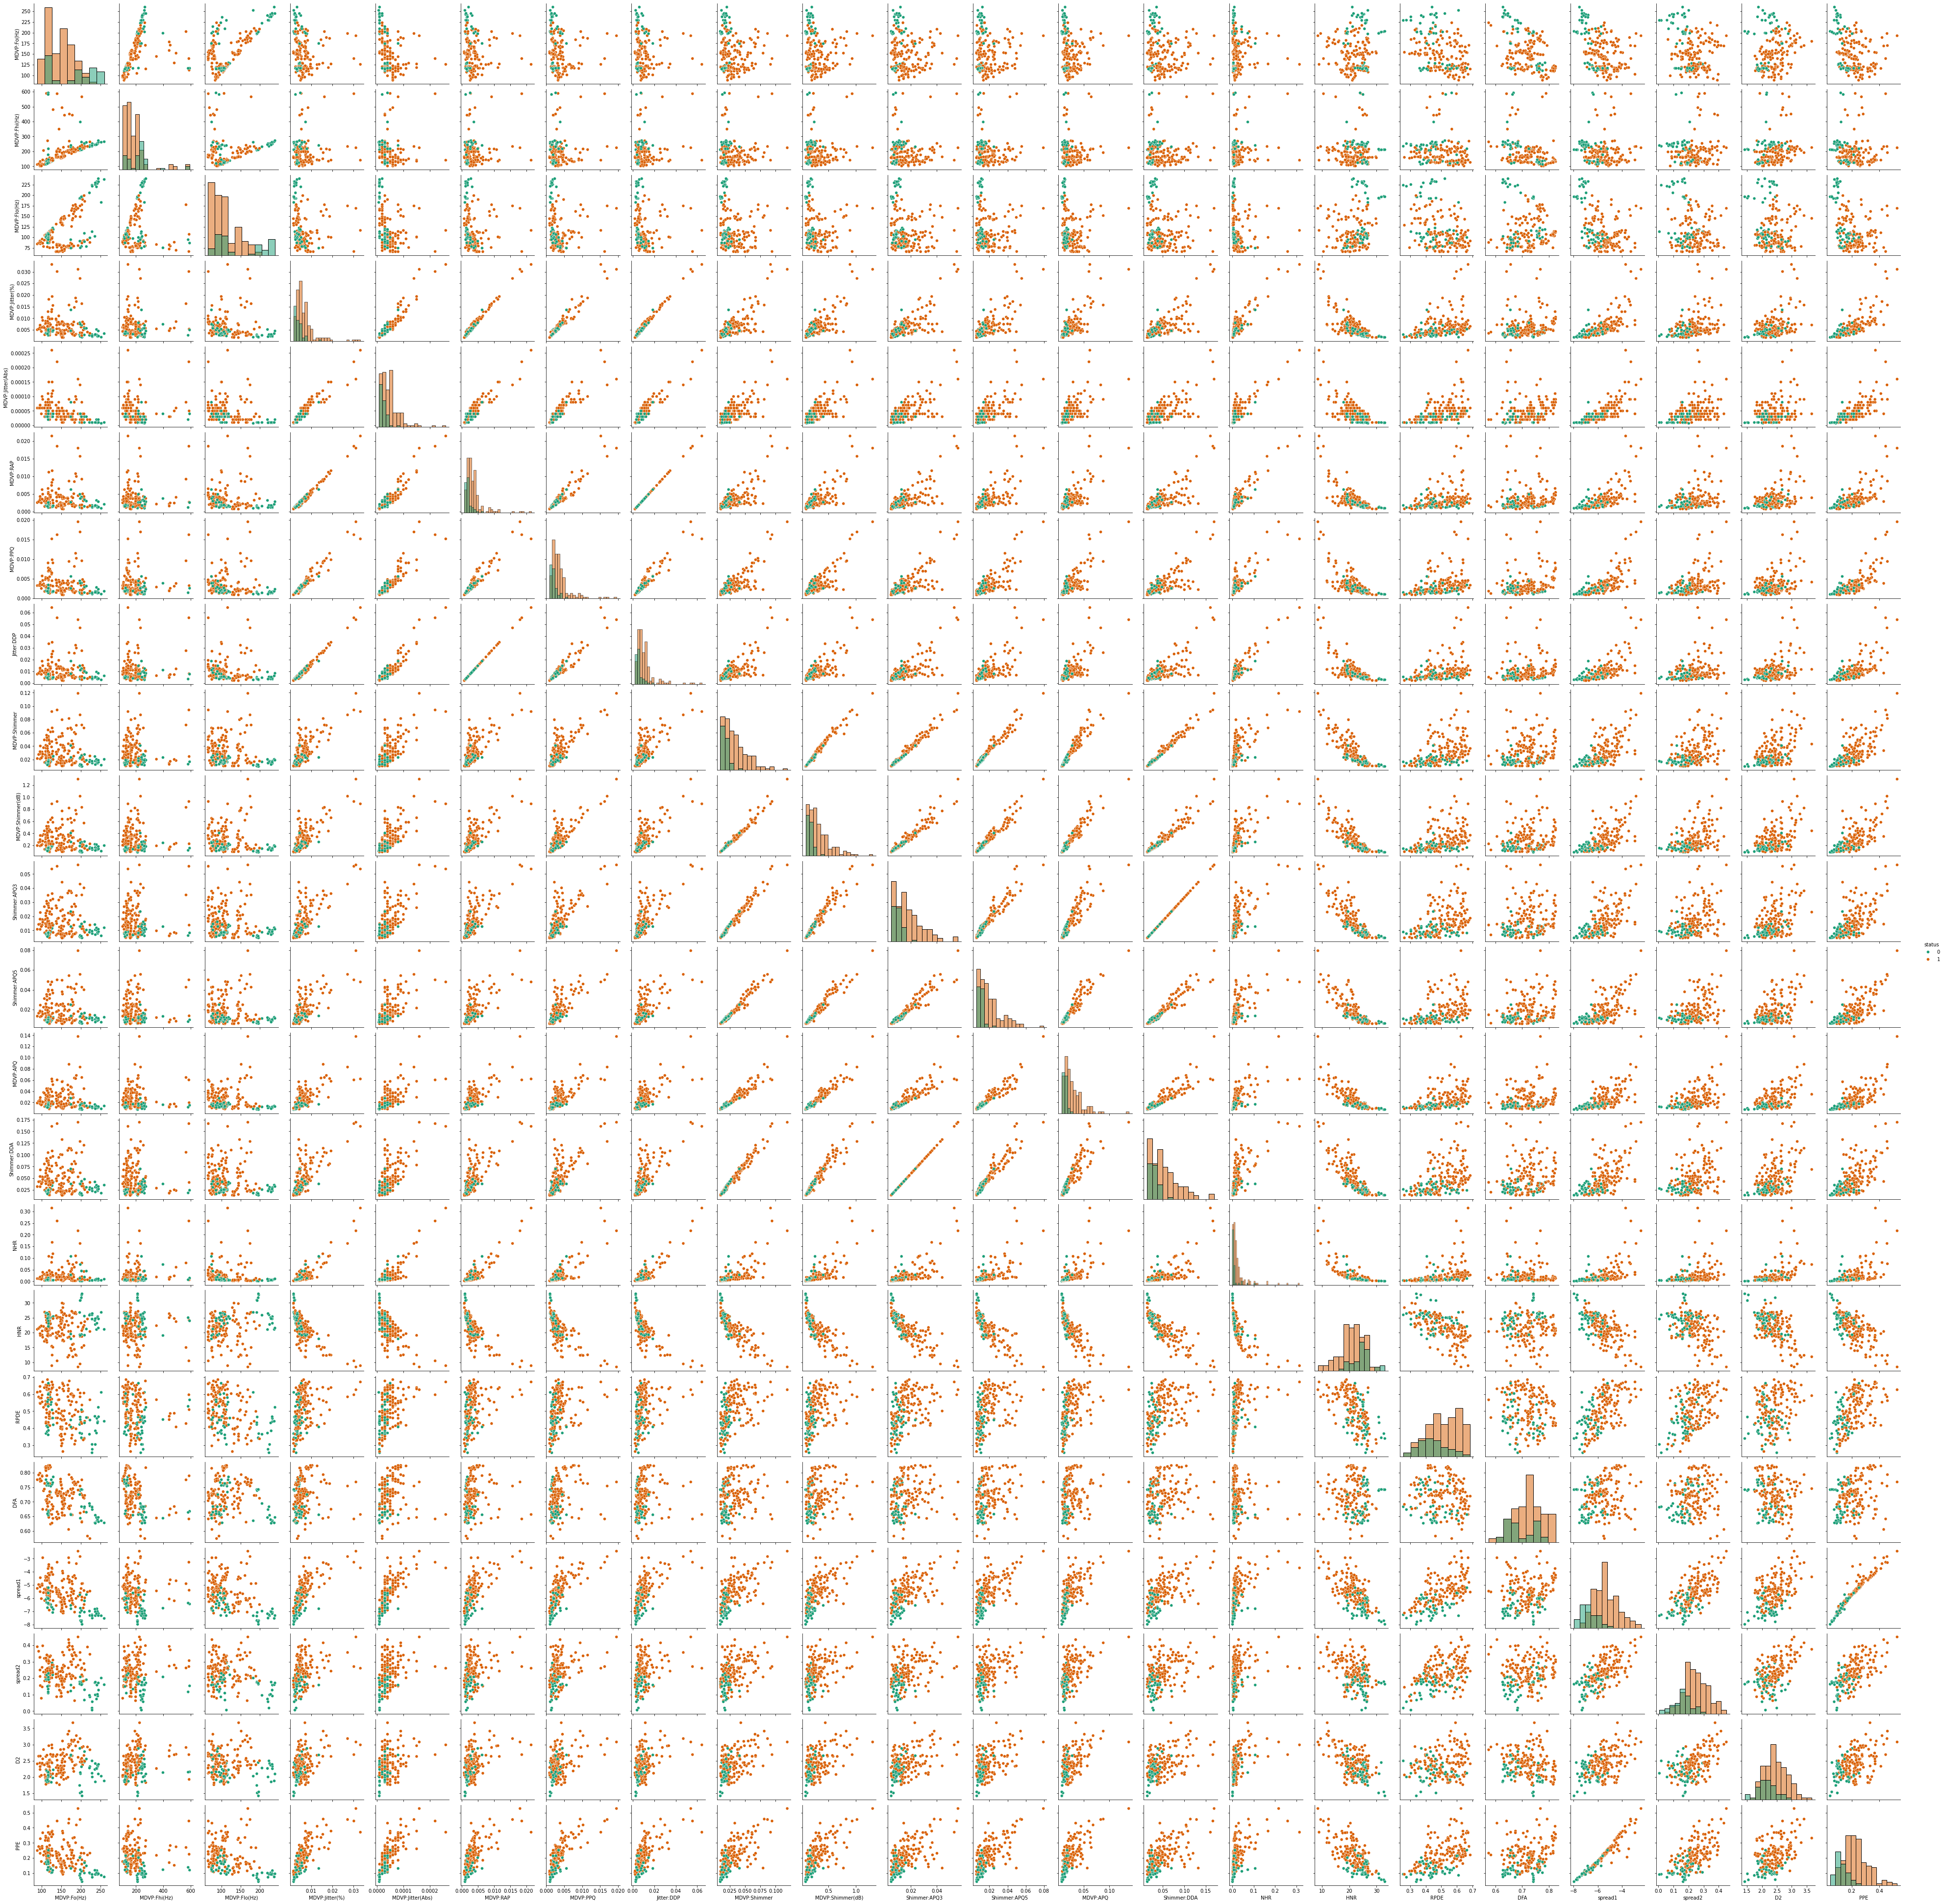

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'parkinsons' is your DataFrame
# You can set the desired height value (e.g., 3)
sns.pairplot(parkinsons, hue='status', palette='Dark2', diag_kind='hist')

# Show the plot
plt.show()


# Data Pre-Processing

In [20]:
X = parkinsons.drop(columns=['name','status'], axis=1)
y = parkinsons['status']

In [21]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [22]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Data Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
     

StandardScaler()

In [26]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [27]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


# Support Vector Machine Model

In [28]:
model = svm.SVC()

In [29]:
model.fit(X_train,y_train)
     

SVC()

# Model Evaluation

In [30]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
     

In [31]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9166666666666666


In [32]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
     

In [33]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9166666666666666


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
     

In [35]:
pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 4  4]
 [ 0 31]]


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.89      1.00      0.94        31

    accuracy                           0.90        39
   macro avg       0.94      0.75      0.80        39
weighted avg       0.91      0.90      0.88        39



# Hyper-Tuning the model

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [1]:
grid=GridSearchCV(svm.SVC(),param_grid,verbose=3)

NameError: name 'GridSearchCV' is not defined

In [39]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.750 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.742 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.742 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.742 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.742 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.750 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.742 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.742 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.742 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.742 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.750 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 4/5] END ...................C=1000, gamma=1;, score=0.806 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.774 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.969 total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.968 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.935 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.935 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.871 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.906 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.968 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.935 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.903 total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.903 total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [40]:
grid.best_params_

{'C': 100, 'gamma': 0.1}

In [41]:
grid.best_estimator_
     

SVC(C=100, gamma=0.1)

In [42]:
grid_pred=grid.predict(X_test)

In [43]:
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))
     

[[ 8  0]
 [ 3 28]]


              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.90      0.95        31

    accuracy                           0.92        39
   macro avg       0.86      0.95      0.90        39
weighted avg       0.94      0.92      0.93        39



We can see the GridSearch has very much improved our model.

Now, we can build a predictive model.

# Building a Predictive System

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

#converting input data into numpy array
input_data_numpy=np.asarray(input_data)

#reshaping
input_data_reshaped = input_data_numpy.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("The person does not have Parkinson's Disease.")

else:
  print("The person has Parkinson's Disease.")

[0]
The person does not have Parkinson's Disease.


In [46]:
input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

input_data_numpy=np.asarray(input_data)

input_data_reshaped = input_data_numpy.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("The person does not have Parkinson's Disease.")

else:
  print("The person has Parkinson's Disease.")

[1]
The person has Parkinson's Disease.


In [47]:
input_data = (199.22800,209.51200,192.09100,0.00241,0.00001,0.00134,0.00138,0.00402,0.01015,0.08900,0.00504,0.00641,0.00762,0.01513,0.00167,30.94000,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501)

#converting input data into numpy array
input_data_numpy=np.asarray(input_data)

#reshaping
input_data_reshaped = input_data_numpy.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("The person does not have Parkinson's Disease.")

else:
  print("The person has Parkinson's Disease.")
     

[0]
The person does not have Parkinson's Disease.


In [49]:
input_data = (120.267,137.244,114.82,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.14,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,0.59604,0.764112,-5.634322,0.257682,1.854785,0.211756)

#converting input data into numpy array
input_data_numpy=np.asarray(input_data)

#reshaping
input_data_reshaped = input_data_numpy.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("The person does not have Parkinson's Disease.")

else:
  print("The person has Parkinson's Disease.")

[1]
The person has Parkinson's Disease.
